In [1]:
# upward and downward trends in google stock price analysis with RNN LSTM for predicting future stock price
# we have stock price of google from 2012-2016 and want to predict opening prices for january 2017 (day by day)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler # for normalization of the data Xnorm = x-min(x)/max(x)-min(x)

import keras
from keras.models import Sequential # initializes neural network
from keras.layers import Dense # for implementing ANN layers, it also takes care of weight initilization for us
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [2]:
# Data preprocessing
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

sc = MinMaxScaler(feature_range=(0, 1))
trainingset_scaled = sc.fit_transform(training_set) # scale train data between 0 and 1

In [3]:
# create a data structure with 60 timesteps(before) and 1 output **many to one**
#               y1  => Y_train
# x1 x2 x3 ... x60  => X_train

X_train = []
Y_train = []

for i in range(60, 1258):
                                              # its zero because we only want the first column
    X_train.append(trainingset_scaled[i-60:i, 0])
    Y_train.append(trainingset_scaled[i, 0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [23]:
X_train[0], Y_train[0]  # example of 60 input for X and 1 output for Y

In [5]:
# reshaping input data to fit in the keras input format for rnn
                               # batch size      # timesteps       # indicators
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [6]:
# LSTM structure
regressor = Sequential()
# units : number of neurons in layer (they dont need to be equal to number of inputs of X_train!!)
# return_sequences : True if we want to have deep lstm with several layers (false by default)
# input_shape : input data for lstm, we give it only 2d matrix but it will detect batch size automatically
regressor.add(LSTM(units = 50,  return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(rate=0.2))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
# 3 extra LSTM layers
# we dont mention input_shape here since rnn automatically detects 50 neuron inputs from last layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(rate=0.2))

In [9]:
# output layer of RNN, there is only one output which is predicted stock price
regressor.add(Dense(units = 1))
# since here we have continous values we use MSE instead of crossentropy
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error') 

# we update weights for each 32 training examples (mini-batche)
regressor.fit(X_train, Y_train, epochs=100, batch_size=32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0382
Epoch 2/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0055
Epoch 3/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0047
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0046
Epoch 5/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0043
Epoch 6/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0044
Epoch 7/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0044
Epoch 8/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0037
Epoch 9/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0040
Epoch 10/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0040
Epoch 11/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0036
Epoch 12/100
1198/1198 [==

In [19]:
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")
real_Y = dataset_test.iloc[:, 1:2].values  # this is the real Y values

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test)-60:].values
inputs = inputs.reshape(-1,+1) # since we didnt use iloc we need to reshape the matrix to correct format
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [20]:
Y_pred = regressor.predict(X_test)
Y_pred = sc.inverse_transform(Y_pred)

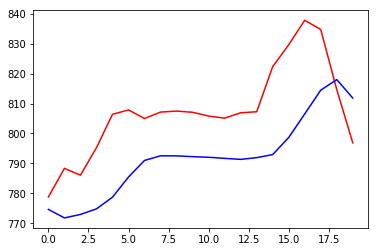

In [22]:
# visualizing
plt.plot(real_Y, color = 'red', label="real stock")
plt.plot(Y_pred, color = 'blue', label = 'predicted stock')
plt.show()